# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp
import seaborn as sns
sns.set_theme()

In [2]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv

d1=pd.read_csv("air traffic.csv")

# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [3]:
## TODO: Check the summary of the DataFrame to see its structure and data types.
d1.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [4]:
d1.replace(',','', regex=True, inplace = True)
d1

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,93548998,77821407,31950687,109772094,85.77,83.90,85.22
245,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,98672591,78058358,33410671,111469028,88.13,89.44,88.52
246,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,103643904,81986010,35326191,117312202,88.15,88.82,88.35
247,2023,8,71477988,11572149,83050137,691482,77137,768619,67933484,29938507,97871992,81997399,34908793,116906192,82.85,85.76,83.72


In [5]:
d1 = d1.apply(pd.to_numeric)

# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

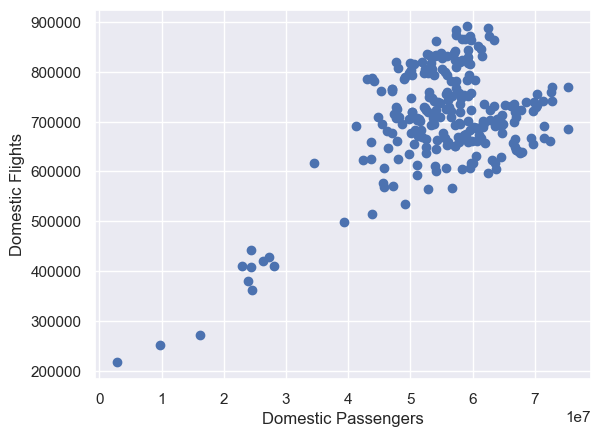

In [6]:
## TODO: Explore the relationship between domestic passengers and domestic flights.
x=d1["Dom_Pax"]
y=d1["Dom_Flt"]

plt.scatter(x,y)
plt.xlabel('Domestic Passengers')
plt.ylabel("Domestic Flights")
plt.show()


They seem to follow a linear relationship.

In [7]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.
a,b,r_value,p_value,stderr=stats.linregress(x,y)
def model(x_point):
    return a*x_point + b

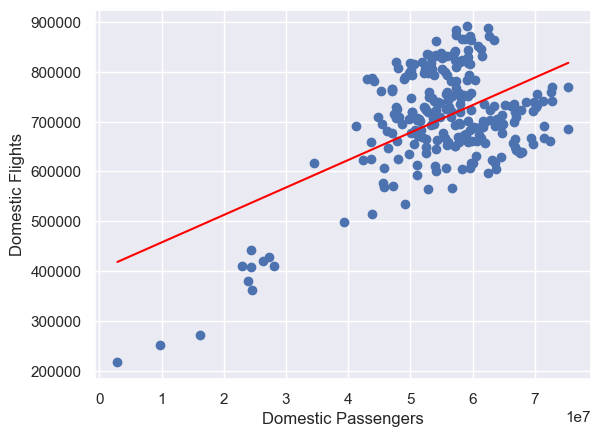

In [8]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.
plt.scatter(x,y)
plt.xlabel('Domestic Passengers')
plt.ylabel("Domestic Flights")
x_l = np.linspace(min(x),max(x), 1000)
y_l = model(x_l)
plt.plot(x_l,y_l, color = "red")
plt.show()


In [9]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
print(f"Slope: {np.round(a,2)}\nIntercept {np.round(b,2)}\np-value: {p_value}\nStandard Error: {np.round(stderr,3)}\nPredicted value for 100 domestic passengers: {int(model(100))}")

Slope: 0.01
Intercept 402758.72
p-value: 5.3156895585332156e-20
Standard Error: 0.001
Predicted value for 100 domestic passengers: 402759


# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [10]:
## TODO: Print r

print(f"r: {np.round(r_value,2)}")

r: 0.54


# Linear Regression


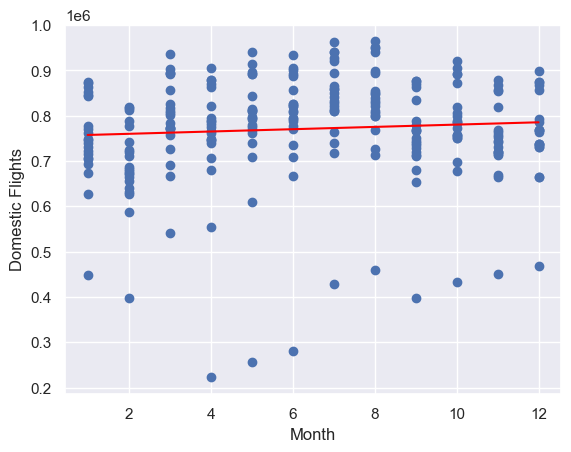

slope = 2543.5948151487823
intercept = 755091.4229786595
r² = 0.07569664261539753
p = 0.23397920135464817
std_err = 2131.940150465658


In [11]:
## TODO: Calculate linear regression parameters
x=d1["Month"]
y=d1["Flt"]

## TODO:  Define the function for the linear model
def model(x_point):
    return a*x_point + b

## TODO:  Apply the model to the 'Month' data
a,b,r2,p,std_err=stats.linregress(x,y)

## TODO:  Plot the scatter plot and the regression line
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel("Domestic Flights")
x_l = np.linspace(min(x),max(x), 1000)
y_l = model(x_l)
plt.plot(x_l,y_l, color = "red")
plt.show()

# Results
print("slope =", a)
print("intercept =", b)
print("r² =", r2)
print("p =", p)
print("std_err =", std_err)


In [12]:
## TODO: Print r2
print("r² =", r2)

r² = 0.07569664261539753


**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [13]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)

x= d1["Dom_Pax"]
y= d1["Dom_Flt"]

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)


In [14]:
## TODO: Split the data into training and validation sets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)


In [15]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

LR.score(X_train, y_train)

0.32545375043217717

In [16]:
LR.predict(X_test[[0]]) # One example

array([[733688.53685841]])

In [17]:
## TODO: Print the prediction for the given input. -- already did it

The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [18]:
## TODO: Calculate the mean squared error (MSE) for the training set.
mse=mean_squared_error(X_train, y_train)
int(mse)

3034108978423757

What do you think ?

It's an awful fit :)

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [19]:
## TODO: Reshape the features mx and target variables my .

mx=d1[["Dom_Pax","Month"]]
my=d1["Dom_Flt"]

my=np.array(my).reshape(-1,1)

In [20]:
## TODO: Split the features and target variables into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(mx, my, test_size=0.30, random_state = 42)

In [21]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score

multireg = LinearRegression()
multireg.fit(X_train, y_train)
multireg.score(X_train, y_train)

0.32604230121376376

In [22]:
## TODO: Print the target values
X_test

,Dom_Pax,Month
137,59261855,6
6,55810773,7
97,43657818,2
60,50245100,1
112,55749349,5
...,...,...
73,43677233,2
224,53902837,9
115,58646304,8
75,52245401,4


In [23]:
## TODO: Make a prediction using the multiple regression model.
y_pred = multireg.predict(X_test) # All the predictions for the subset X_test

# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [24]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice

# One sample test

is used to compare the diffrence between sample and population mean

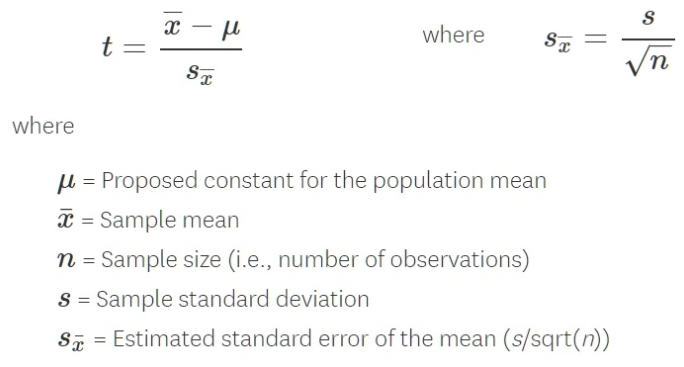

In [25]:
## TODO: Calculate the population mean of the "Year" column.
popmean = d1['Year'].mean()
popmean

2012.879518072289

In [26]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)

In [27]:
sample

array([2017, 2012, 2012, 2007, 2015, 2019, 2008, 2020, 2003, 2019, 2006,
       2013, 2006, 2017, 2022, 2017, 2005, 2022, 2018, 2004, 2010, 2022,
       2015, 2016, 2016, 2010, 2012, 2004, 2021, 2023, 2021, 2007, 2011,
       2003, 2012, 2013, 2021, 2008, 2016, 2023, 2018, 2014, 2014, 2021,
       2017, 2014, 2015, 2016, 2013, 2009], dtype=int64)

In [28]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,popmean)

In [29]:
ttest

1.3006180215939347

In [30]:
sample.mean()

2013.94

In [31]:
## TODO: Perform hypothesis testing based on the p-value.
if p_value <= 0.05:
    print(f"p_value: {p_value}. It's possible to reject the null hypothesis")
else:
    print(f"p_value: {p_value}. It's not possible to reject the null hypothesis")

p_value: 0.1994730441871902. It's not possible to reject the null hypothesis


# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

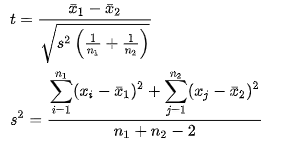

In [32]:
## TODO: Randomly select a sample of 50 from the "Flt" column.
sample_Flt = np.random.choice(d1["Flt"],50)

In [33]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.
sample_Dom_Pax = np.random.choice(d1["Dom_Pax"],50)

In [34]:
## TODO: Perform an independent t-test between `sample_a` and `sample_b` to compare their means.

In [35]:
_,p_value=stats.ttest_ind(a=sample_Flt,b=sample_Dom_Pax,equal_var=False)
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 8.370464930477963e-41


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)